In [37]:
import numpy as np
import numba as nb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import cached_property
import scienceplots
from matplotlib.ticker import StrMethodFormatter, MaxNLocator

plt.style.use(["science"])

In [137]:
class QuantumSystem:
    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        self.N = 2**n_qubits
        self.uniform_superposition = self.normalise(np.array([complex(1, 0)] * 2**(self.n_qubits)))
        self.register = self.uniform_superposition.copy()

    def normalise(self, system):
        return system / np.sqrt(np.sum(np.abs(system)**2))

    def measurement(self):
        return np.searchsorted(np.cumsum(np.abs(self.register)**2), np.random.random())


class QFT(QuantumSystem):
    def __init__(self, n_qubits):
        self.n_qubits = n_qubits
        QuantumSystem.__init__(self, self.n_qubits)

    @cached_property
    def qft_operator(self):
        N = 2**(self.n_qubits)
    
        roots = np.zeros(N, dtype=complex)
        for k in range(N):
            roots[k] = np.exp(-(2 * k * np.pi * 1j) / N)
        
        s = np.zeros((N, N), dtype=complex)
        for col in range(N):
            s[:, col] = roots**col
            
        return s / np.sqrt(N)
        
    def step(self):
        self.register = np.matmul(self.qft_operator, self.register)
        
    def inverse_step(self):
        self.register = np.matmul(np.conj(self.qft_operator).T, self.register)

## input

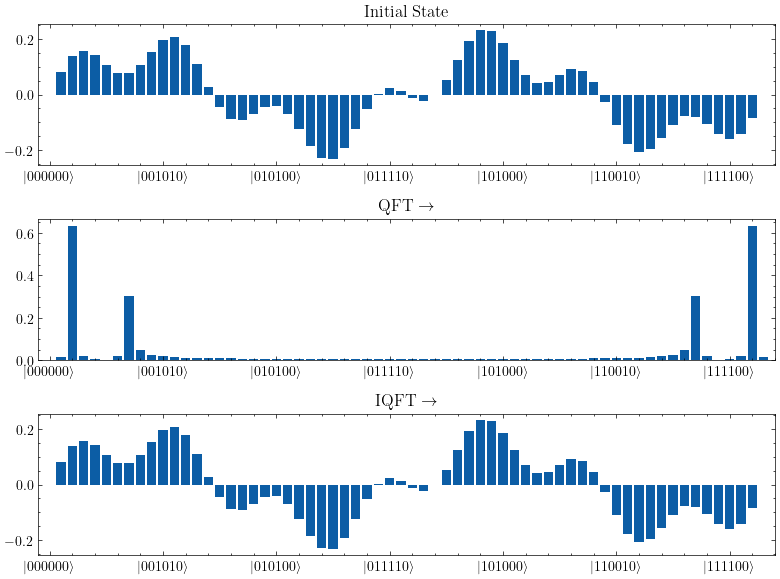

In [172]:
n_qubits = 6
N = 2**n_qubits

qft = QFT(n_qubits=n_qubits)
xs = np.arange(0, N)

ys = 2 * np.sin(2 * (2 * np.pi) * xs / (N - 1)) + np.sin(7 * (2 * np.pi) * xs / (N - 1))
qft.register = qft.normalise(ys)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))

ax1.xaxis.set_major_formatter(lambda x, pos: f"$\\mid${int(x):0{qft.n_qubits}b}$\\rangle$")
ax1.set_xlim(min(xs)-1, max(xs)+1)
ax1.bar(xs, qft.register.real)
ax1.set_title("Initial State")

ax2.xaxis.set_major_formatter(lambda x, pos: f"$\\mid${int(x):0{qft.n_qubits}b}$\\rangle$")
ax2.set_xlim(min(xs)-1, max(xs)+1)
qft.step()
ax2.bar(xs, qft.normalise([abs(x) for x in qft.register]))
ax2.set_title(r"QFT $\rightarrow$")

ax3.xaxis.set_major_formatter(lambda x, pos: f"$\\mid${int(x):0{qft.n_qubits}b}$\\rangle$")
ax3.set_xlim(min(xs)-1, max(xs)+1)
qft.inverse_step()
ax3.bar(xs, qft.register.real)
ax3.set_title(r"IQFT $\rightarrow$")

fig.tight_layout()